## CLASSIFICATION - WILDFIRES IN CA

### Reference: https://www.kaggle.com/edhirif/predict-the-causes-of-wildfires-using-python

## RANDOM FOREST CLASSIFICATION WITH JUST ENCODING

In [311]:
from sklearn import tree, preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2

In [312]:
# Loading the final dataframe
data= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
data.rename(columns = {'DATE':'YEAR'}, inplace = True) 
print(data.columns)
data.head()

Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'YEAR', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,AWND,DX90,EMXP,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1759,1702.002813
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1450,844.446657
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,99,1141.746990
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,172,2029.504605
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1868,4435.980601


In [313]:
data['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'])
data['MONTH'] = data['DATE'].dt.month
data['DAY_OF_WEEK'] = data['DATE'].dt.dayofweek
data['BURN_TIME'] = (pd.to_datetime(data['CONT_DATE']) - data['DATE']).astype(int)+1

In [314]:
drop_vars = ['ID','EMXP','EMXT','TMAX','TMIN','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_CODE','DISCOVERY_DOY', 'DISCOVERY_DATE',
             'DISCOVERY_TIME','STAT_CAUSE_CODE','OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME', 'YEAR',
            'CONT_DATE', 'CONT_DOY', 'CONT_TIME','FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
             'STATE', 'FIPS_CODE','NEAR_FID','FIRE_NAME','County']
data= data.drop(drop_vars, axis=1)
data = data.drop('DATE',axis=1)
#data = data.dropna()
data.head()

,LATITUDE,LONGITUDE,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME
0,38.900278,-120.002500,2000,Campfire,0.1,5.0,1.0,NaN,44.0,1702.002813,7,0,1
1,38.893889,-120.032222,2000,Campfire,0.1,5.0,1.0,NaN,44.0,844.446657,7,4,1
2,38.900000,-119.983333,2000,Children,0.1,5.0,1.0,NaN,44.0,1141.746990,5,1,1
3,39.016944,-120.125000,2000,Smoking,1.0,5.0,1.0,NaN,44.0,2029.504605,6,3,1
4,38.851389,-119.968333,2000,Campfire,0.1,5.0,1.0,NaN,44.0,4435.980601,7,0,1


In [315]:
#taking care of null or missing values
from sklearn.impute import SimpleImputer
le = preprocessing.LabelEncoder()
#data['STAT_CAUSE_DESCR'] = le.fit_transform(data['STAT_CAUSE_DESCR'])
data['DX90'] = data['DX90'].fillna(0)
imp_median = SimpleImputer(strategy = "median")
data[['AWND']] = imp_median.fit_transform(data[['AWND']]).ravel() 
data[['PRCP']] = imp_median.fit_transform(data[['PRCP']]).ravel()
data[['TAVG']] = imp_median.fit_transform(data[['TAVG']]).ravel()
data.isnull().sum()
data.head()

,LATITUDE,LONGITUDE,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME
0,38.900278,-120.002500,2000,Campfire,0.1,5.0,1.0,11.85,44.0,1702.002813,7,0,1
1,38.893889,-120.032222,2000,Campfire,0.1,5.0,1.0,11.85,44.0,844.446657,7,4,1
2,38.900000,-119.983333,2000,Children,0.1,5.0,1.0,11.85,44.0,1141.746990,5,1,1
3,39.016944,-120.125000,2000,Smoking,1.0,5.0,1.0,11.85,44.0,2029.504605,6,3,1
4,38.851389,-119.968333,2000,Campfire,0.1,5.0,1.0,11.85,44.0,4435.980601,7,0,1


In [316]:
#data['STAT_CAUSE_DESCR_code'] = le.fit_transform(data['STAT_CAUSE_DESCR'])

In [317]:
#df_2 = pd.DataFrame(data['STAT_CAUSE_DESCR'],data['STAT_CAUSE_DESCR_code'])
#df_2.groupby(['STAT_CAUSE_DESCR','STAT_CAUSE_DESCR_code']).count()

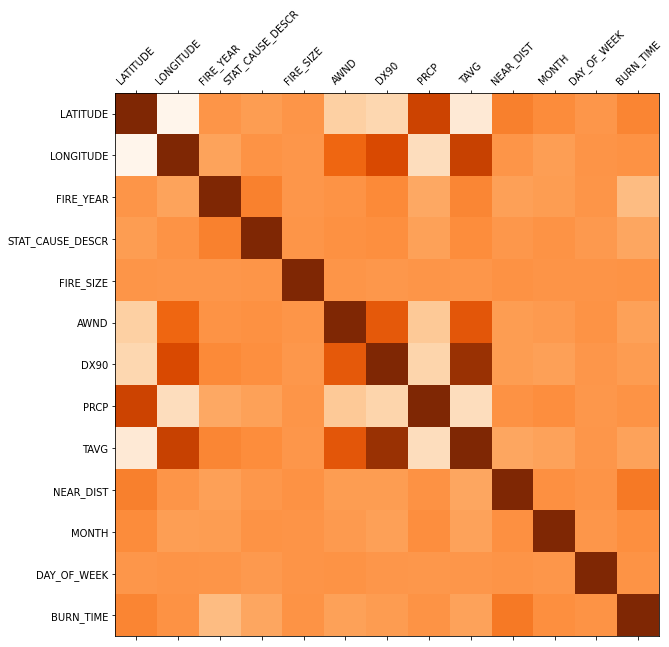

In [242]:
import matplotlib.pyplot as plt
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(data)

In [318]:
#trying for multi class using all the encoded description
from sklearn.model_selection import train_test_split
X = data.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = data['STAT_CAUSE_DESCR'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42, shuffle=True)

In [319]:
import sklearn.ensemble as ske
#Random Forest Classification
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.4676579459188155


In [320]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 339   20   12   42  177    1   77  398  255    1    0    6    0]
 [  22  246    3   14   72    0  178  224   28    3    0    4    0]
 [  31    7   36   19   54    0   12  174  166    1    0    5    0]
 [  27   20    7  366   56    0   51  272  302    0    0    4    0]
 [ 118   51   23   65  679    2  135  706  361    4    0   11    0]
 [   0    0    1    0    1    0    3    6    1    0    0    0    0]
 [  19   72    3    9   79    2 2252  229   53    1    0    3    0]
 [ 165  141   41  190  508    0  334 1752  725    6    2   35    0]
 [  63   13   26  143  127    0   73  552 1785    0    0   18    0]
 [   6    0    2    6   32    0    9   50   28   16    0    0    0]
 [   1    0    0    1    7    0   14   14    3    0    5    0    0]
 [  16   15    9   13   57    0   23  120  136    0    0   27    0]
 [   1    1    0    0    2    0    3    0    2    0    0    0    0]]


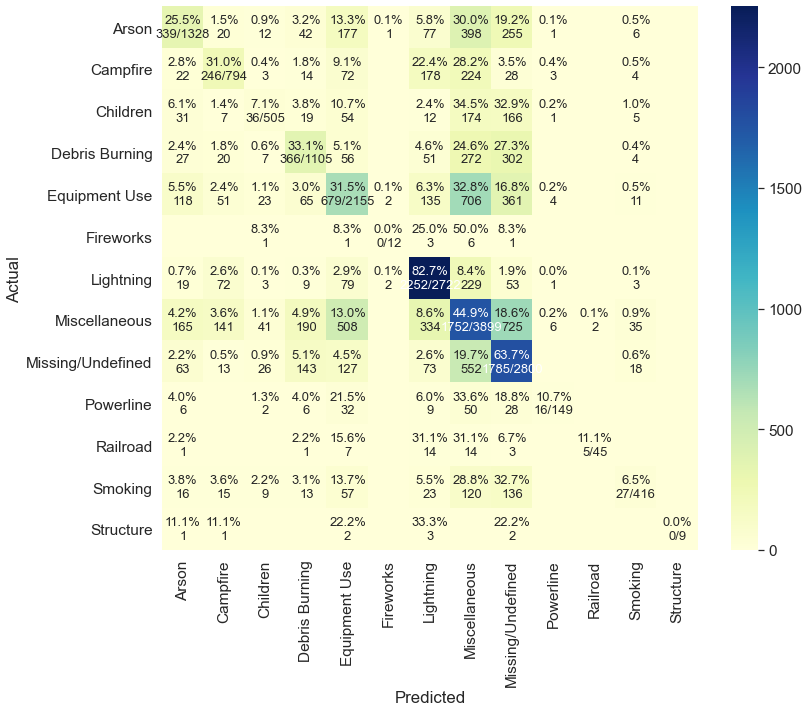

In [321]:
def plot_cm(y_test, y_pred, figsize=(12,10)):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax, annot_kws={"size": 13})
plot_cm(y_test, y_pred)

In [283]:
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(10,10)) 
#sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Oranges', ax=ax)

In [112]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.41      0.25      0.31      1328
           1       0.43      0.32      0.37       794
           2       0.20      0.06      0.09       505
           3       0.41      0.32      0.36      1105
           4       0.37      0.31      0.34      2155
           5       0.00      0.00      0.00        12
           6       0.71      0.82      0.76      2722
           7       0.39      0.45      0.42      3899
           8       0.46      0.64      0.54      2800
           9       0.36      0.08      0.13       149
          10       0.71      0.11      0.19        45
          11       0.25      0.06      0.10       416
          12       0.00      0.00      0.00         9

    accuracy                           0.47     15939
   macro avg       0.36      0.26      0.28     15939
weighted avg       0.45      0.47      0.45     15939



# Multi-class: Let's label the data to improve the values by labelling the causes of the fire 

In [296]:
# Loading the final dataframe
data_1= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
data_1.rename(columns = {'DATE':'YEAR'}, inplace = True) 
print(data_1.columns)
#data_1

Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'YEAR', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


In [297]:
data_1['DATE'] = pd.to_datetime(data_1['DISCOVERY_DATE'])
data_1['MONTH'] = data_1['DATE'].dt.month
data_1['DAY_OF_WEEK'] = data_1['DATE'].dt.dayofweek
data_1['BURN_TIME'] = (pd.to_datetime(data_1['CONT_DATE']) - data_1['DATE']).astype(int)+1

In [298]:
drop_vars = ['ID','EMXP','EMXT','TMAX','TMIN','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_CODE','DISCOVERY_DOY', 'DISCOVERY_DATE',
             'DISCOVERY_TIME','STAT_CAUSE_CODE','OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME', 'YEAR',
            'CONT_DATE', 'CONT_DOY', 'CONT_TIME','FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
             'STATE', 'FIPS_CODE','NEAR_FID','FIRE_NAME','County']
data_1= data_1.drop(drop_vars, axis=1)
data_1 = data_1.drop('DATE',axis=1)
#data = data.dropna()
#data.head()
data_1

,LATITUDE,LONGITUDE,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME
0,38.900278,-120.002500,2000,Campfire,0.10,5.0,1.0,NaN,44.0,1702.002813,7,0,1
1,38.893889,-120.032222,2000,Campfire,0.10,5.0,1.0,NaN,44.0,844.446657,7,4,1
2,38.900000,-119.983333,2000,Children,0.10,5.0,1.0,NaN,44.0,1141.746990,5,1,1
3,39.016944,-120.125000,2000,Smoking,1.00,5.0,1.0,NaN,44.0,2029.504605,6,3,1
4,38.851389,-119.968333,2000,Campfire,0.10,5.0,1.0,NaN,44.0,4435.980601,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,34.111512,-117.234936,2015,Miscellaneous,1.00,8.1,176.0,4.00,76.8,493.401885,11,0,-1448236799999999999
53124,34.500000,-118.633333,2015,Equipment Use,0.12,9.8,105.0,5.53,63.7,798.435161,11,6,-1446335999999999999
53125,33.551944,-117.097584,2015,Missing/Undefined,0.01,6.5,184.0,2.09,76.6,5277.486426,11,2,1
53126,37.100631,-121.013584,2015,Arson,0.35,6.0,105.0,6.81,63.6,3459.238393,10,4,1


In [299]:
#taking care of null or missing values
from sklearn.impute import SimpleImputer
le = preprocessing.LabelEncoder()
#data['STAT_CAUSE_DESCR'] = le.fit_transform(data['STAT_CAUSE_DESCR'])
data_1['DX90'] = data_1['DX90'].fillna(0)
imp_median = SimpleImputer(strategy = "median")
data_1[['AWND']] = imp_median.fit_transform(data_1[['AWND']]).ravel() 
data_1[['PRCP']] = imp_median.fit_transform(data_1[['PRCP']]).ravel()
data_1[['TAVG']] = imp_median.fit_transform(data_1[['TAVG']]).ravel()
data_1.isnull().sum()

LATITUDE            0
LONGITUDE           0
FIRE_YEAR           0
STAT_CAUSE_DESCR    0
FIRE_SIZE           0
AWND                0
DX90                0
PRCP                0
TAVG                0
NEAR_DIST           0
MONTH               0
DAY_OF_WEEK         0
BURN_TIME           0
dtype: int64

In [300]:
#data.head()

In [301]:
#data.corr()

## Multi-Class Classification

In [302]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = "Natural"
    elif cat in accidental:
        cause = "Accidental"
    elif cat in malicious:
        cause = "Malicious"
    else:
        cause = "Other"
    return cause
     



In [303]:
data_1['LABEL'] = data_1['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) 
data_1 = data_1.drop('STAT_CAUSE_DESCR',axis=1)
#data_1 = data_1.drop('DATE',axis=1)
#data = data.dropna()
data_1.head()

,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME,LABEL
0,38.900278,-120.002500,2000,0.1,5.0,1.0,11.85,44.0,1702.002813,7,0,1,Accidental
1,38.893889,-120.032222,2000,0.1,5.0,1.0,11.85,44.0,844.446657,7,4,1,Accidental
2,38.900000,-119.983333,2000,0.1,5.0,1.0,11.85,44.0,1141.746990,5,1,1,Accidental
3,39.016944,-120.125000,2000,1.0,5.0,1.0,11.85,44.0,2029.504605,6,3,1,Accidental
4,38.851389,-119.968333,2000,0.1,5.0,1.0,11.85,44.0,4435.980601,7,0,1,Accidental


In [304]:
data_1.groupby('LABEL').count()

,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME
LABEL,,,,,,,,,,,,
Accidental,17364,17364,17364,17364,17364,17364,17364,17364,17364,17364,17364,17364
Malicious,4321,4321,4321,4321,4321,4321,4321,4321,4321,4321,4321,4321
Natural,9095,9095,9095,9095,9095,9095,9095,9095,9095,9095,9095,9095
Other,22348,22348,22348,22348,22348,22348,22348,22348,22348,22348,22348,22348


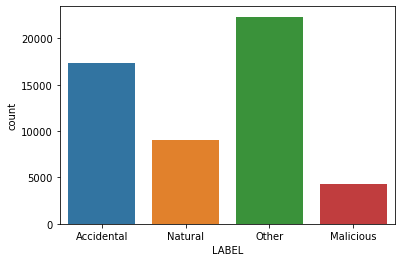

In [305]:
# explore created binary popular measure
import seaborn as sns
sns.countplot(x='LABEL',data= data_1)
plt.show()

In [307]:
X = data_1.drop(['LABEL'], axis=1).values
y = data_1['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)
clf_rf = ske.RandomForestClassifier(n_estimators = 100)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.5993788819875776


In [308]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1660   76  217 1518]
 [ 274  170   42  395]
 [ 201    8 1439  179]
 [1085   71  185 3106]]


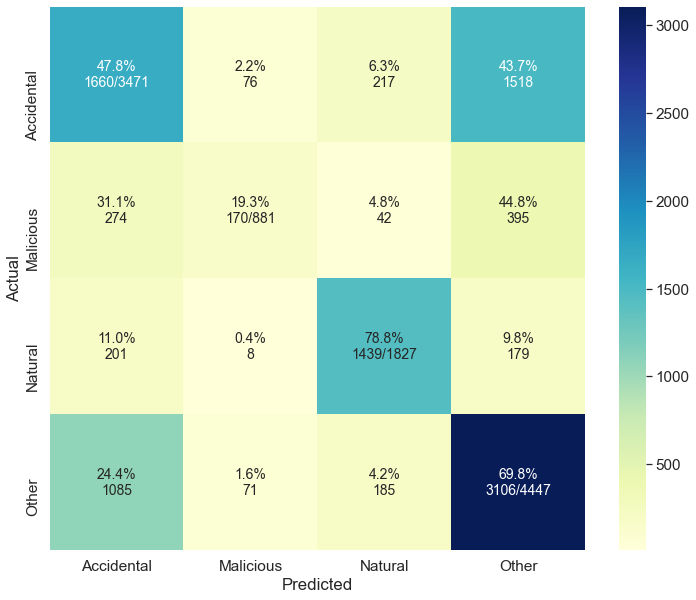

In [310]:
def plot_cm(y_test, y_pred, figsize=(12,10)):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax,annot_kws={"size": 14})
    
plot_cm(y_test, y_pred)

In [282]:
#cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#fig,ax = plt.subplots(figsize=(10,10))
#ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
#for i in range(cmn.shape[0]):
    #for j in range(cmn.shape[1]):
        #ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
#plt.xlabel('predicted label')
#plt.ylabel('true label')
#plt.show()

In [144]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.77      0.78      0.77      2722
           2       0.51      0.48      0.50      5190
           3       0.51      0.17      0.26      1328
           4       0.60      0.69      0.64      6699

    accuracy                           0.60     15939
   macro avg       0.60      0.53      0.54     15939
weighted avg       0.59      0.60      0.59     15939



# BINARY CLASSIFICATION

## Accidental only (one-class classification) - had more numbers after miscellaneous

In [149]:
# Loading the final dataframe
df_ca= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
df_ca.rename(columns = {'DATE':'YEAR'}, inplace = True) 
print(df_ca.columns)

Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'YEAR', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


In [150]:
df_ca['DATE'] = pd.to_datetime(df_ca['DISCOVERY_DATE'])
df_ca['MONTH'] = df_ca['DATE'].dt.month
df_ca['DAY_OF_WEEK'] = df_ca['DATE'].dt.dayofweek
df_ca['BURN_TIME'] = (pd.to_datetime(df_ca['CONT_DATE']) - df_ca['DATE']).astype(int)+1

In [151]:
def set_acc_label(cat):
    cause = 0
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    if cat in accidental:
        cause = 1   
        
    return cause
     
    
df_ca['Accidental'] = df_ca['STAT_CAUSE_DESCR'].apply(lambda x: set_acc_label(x)) 
df_ca

,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST,DATE,MONTH,DAY_OF_WEEK,BURN_TIME,Accidental
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,44.0,59.5,28.5,1759,1702.002813,2000-07-03 00:00:00+00:00,7,0,1,1
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,44.0,59.5,28.5,1450,844.446657,2000-07-07 00:00:00+00:00,7,4,1,1
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,44.0,59.5,28.5,99,1141.746990,2000-05-02 00:00:00+00:00,5,1,1,1
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,44.0,59.5,28.5,172,2029.504605,2000-06-15 00:00:00+00:00,6,3,1,1
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,44.0,59.5,28.5,1868,4435.980601,2000-07-03 00:00:00+00:00,7,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,1871683,34.111512,-117.234936,NONFED,ST-NASF,NaN,LANKERSHIM AV / MCKINLEY,2015,2015/11/23 00:00:00+00,327,...,76.8,89.0,64.7,1247,493.401885,2015-11-23 00:00:00+00:00,11,0,-1448236799999999999,0
53124,1871684,34.500000,-118.633333,NONFED,ST-NASF,NaN,NaN,2015,2015/11/01 00:00:00+00,305,...,63.7,77.7,49.7,390,798.435161,2015-11-01 00:00:00+00:00,11,6,-1446335999999999999,1
53125,1871685,33.551944,-117.097584,NONFED,ST-NASF,NaN,MURRIETA HOT SPRINGS RD /,2015,2015/11/18 00:00:00+00,322,...,76.6,89.4,63.8,1067,5277.486426,2015-11-18 00:00:00+00:00,11,2,1,0
53126,1871686,37.100631,-121.013584,NONFED,ST-NASF,NaN,HENRY,2015,2015/10/23 00:00:00+00,296,...,63.6,77.4,49.7,1870,3459.238393,2015-10-23 00:00:00+00:00,10,4,1,0


In [152]:
drop_vars = ['ID','EMXP','EMXT','TMAX','TMIN','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_CODE','DISCOVERY_DOY', 'DISCOVERY_DATE',
             'DISCOVERY_TIME','STAT_CAUSE_CODE','OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME',
            'CONT_DATE', 'CONT_DOY', 'CONT_TIME','FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
             'STATE', 'FIPS_CODE','NEAR_FID','FIRE_NAME','County']
df_ca= df_ca.drop(drop_vars, axis=1)
df_ca = df_ca.drop('YEAR',axis=1)
df_ca = df_ca.drop('STAT_CAUSE_DESCR',axis=1)
#df_ca = df_ca.drop('FIRE_SIZE',axis=1)
df_ca = df_ca.dropna()
df_ca = df_ca.drop('DATE',axis=1)
df_ca.head()


,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME,Accidental
7,39.100833,-120.216667,2000,0.1,4.9,0.0,71.19,50.7,5555.863153,8,0,1,1
10,39.051944,-120.135000,2000,0.3,4.9,0.0,71.19,50.7,1125.279010,10,5,1,1
12,39.185000,-120.034167,2000,0.3,4.9,0.0,71.19,50.7,5949.041640,10,6,259200000000001,1
13,39.185000,-120.102222,2000,0.1,4.9,0.0,71.19,50.7,589.714828,10,2,1,1
17,39.019444,-120.183333,2000,0.5,4.9,0.0,71.19,50.7,5356.143997,6,2,86400000000001,0


In [153]:
X = df_ca.drop(['Accidental'], axis=1).values
y = df_ca['Accidental'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training
clf_rf = ske.RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.6859756097560976


In [154]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[6511 1071]
 [2490 1408]]


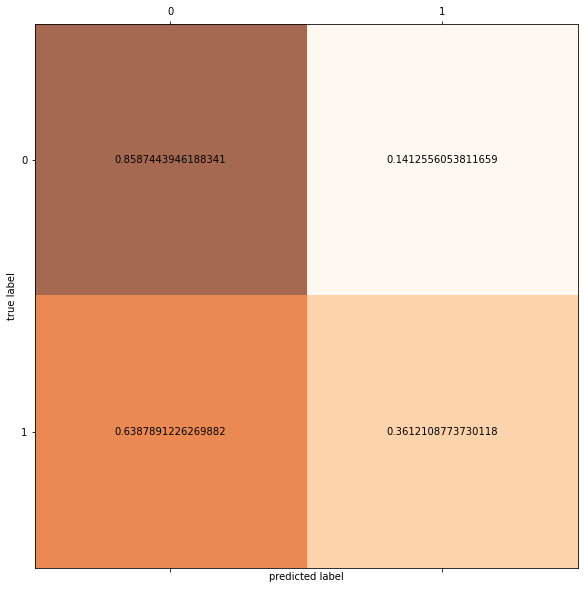

In [155]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

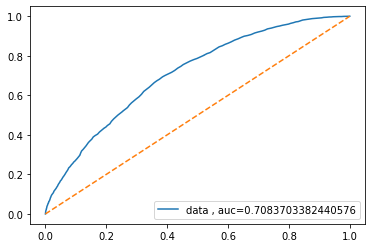

In [157]:
y_pred_proba = clf_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [158]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.86      0.79      7582
           1       0.57      0.36      0.44      3898

    accuracy                           0.69     11480
   macro avg       0.65      0.61      0.61     11480
weighted avg       0.67      0.69      0.67     11480



## Arson(Malicious) only (one-class classification) - cm showed more accurate prediction

In [159]:
# Loading the final dataframe
df_ar= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
df_ar.rename(columns = {'DATE':'YEAR'}, inplace = True) 
print(df_ar.columns)
df_ar

Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'YEAR', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,AWND,DX90,EMXP,EMXT,PRCP,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1759,1702.002813
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1450,844.446657
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,99,1141.746990
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,172,2029.504605
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,5.0,1.0,NaN,91.0,NaN,44.0,59.5,28.5,1868,4435.980601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,1871683,34.111512,-117.234936,NONFED,ST-NASF,NaN,LANKERSHIM AV / MCKINLEY,2015,2015/11/23 00:00:00+00,327,...,8.1,176.0,1.00,118.0,4.00,76.8,89.0,64.7,1247,493.401885
53124,1871684,34.500000,-118.633333,NONFED,ST-NASF,NaN,NaN,2015,2015/11/01 00:00:00+00,305,...,9.8,105.0,0.96,106.0,5.53,63.7,77.7,49.7,390,798.435161
53125,1871685,33.551944,-117.097584,NONFED,ST-NASF,NaN,MURRIETA HOT SPRINGS RD /,2015,2015/11/18 00:00:00+00,322,...,6.5,184.0,0.52,118.0,2.09,76.6,89.4,63.8,1067,5277.486426
53126,1871686,37.100631,-121.013584,NONFED,ST-NASF,NaN,HENRY,2015,2015/10/23 00:00:00+00,296,...,6.0,105.0,1.04,106.0,6.81,63.6,77.4,49.7,1870,3459.238393


In [160]:
df_ar['DATE'] = pd.to_datetime(df_ar['DISCOVERY_DATE'])
df_ar['MONTH'] = df_ar['DATE'].dt.month
df_ar['DAY_OF_WEEK'] = df_ar['DATE'].dt.dayofweek
df_ar['BURN_TIME'] = (pd.to_datetime(df_ar['CONT_DATE']) - df_ar['DATE']).astype(int)+1

In [161]:
def set_arson_label(cat):
    cause = 0
    arson = ['Arson']
    if cat in arson:
        cause = 1   
        
    return cause
     
    
df_ar['Arson'] = df_ar['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
df_ar

,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST,DATE,MONTH,DAY_OF_WEEK,BURN_TIME,Arson
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,44.0,59.5,28.5,1759,1702.002813,2000-07-03 00:00:00+00:00,7,0,1,0
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,44.0,59.5,28.5,1450,844.446657,2000-07-07 00:00:00+00:00,7,4,1,0
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,44.0,59.5,28.5,99,1141.746990,2000-05-02 00:00:00+00:00,5,1,1,0
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,44.0,59.5,28.5,172,2029.504605,2000-06-15 00:00:00+00:00,6,3,1,0
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,44.0,59.5,28.5,1868,4435.980601,2000-07-03 00:00:00+00:00,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,1871683,34.111512,-117.234936,NONFED,ST-NASF,NaN,LANKERSHIM AV / MCKINLEY,2015,2015/11/23 00:00:00+00,327,...,76.8,89.0,64.7,1247,493.401885,2015-11-23 00:00:00+00:00,11,0,-1448236799999999999,0
53124,1871684,34.500000,-118.633333,NONFED,ST-NASF,NaN,NaN,2015,2015/11/01 00:00:00+00,305,...,63.7,77.7,49.7,390,798.435161,2015-11-01 00:00:00+00:00,11,6,-1446335999999999999,0
53125,1871685,33.551944,-117.097584,NONFED,ST-NASF,NaN,MURRIETA HOT SPRINGS RD /,2015,2015/11/18 00:00:00+00,322,...,76.6,89.4,63.8,1067,5277.486426,2015-11-18 00:00:00+00:00,11,2,1,0
53126,1871686,37.100631,-121.013584,NONFED,ST-NASF,NaN,HENRY,2015,2015/10/23 00:00:00+00,296,...,63.6,77.4,49.7,1870,3459.238393,2015-10-23 00:00:00+00:00,10,4,1,1


In [86]:
#df_ca.columns

In [162]:
drop_vars = ['ID','EMXP','EMXT','TMAX','TMIN','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_CODE','DISCOVERY_DOY', 'DISCOVERY_DATE',
             'DISCOVERY_TIME','STAT_CAUSE_CODE','OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME',
            'CONT_DATE', 'CONT_DOY', 'CONT_TIME','FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
             'STATE', 'FIPS_CODE','NEAR_FID','FIRE_NAME','County']
df_ar= df_ar.drop(drop_vars, axis=1)
df_ar = df_ar.drop('DATE',axis=1)
df_ar = df_ar.drop('YEAR',axis=1)
df_ar = df_ar.drop('STAT_CAUSE_DESCR',axis=1)
#df_ca = df_ca.drop('FIRE_SIZE',axis=1)
df_ar = df_ar.dropna()
df_ar.head()


,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME,Arson
7,39.100833,-120.216667,2000,0.1,4.9,0.0,71.19,50.7,5555.863153,8,0,1,0
10,39.051944,-120.135000,2000,0.3,4.9,0.0,71.19,50.7,1125.279010,10,5,1,0
12,39.185000,-120.034167,2000,0.3,4.9,0.0,71.19,50.7,5949.041640,10,6,259200000000001,0
13,39.185000,-120.102222,2000,0.1,4.9,0.0,71.19,50.7,589.714828,10,2,1,0
17,39.019444,-120.183333,2000,0.5,4.9,0.0,71.19,50.7,5356.143997,6,2,86400000000001,0


In [164]:
X = df_ar.drop(['Arson'], axis=1).values
y = df_ar['Arson'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training
clf_rf = ske.RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.9277003484320557


In [165]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10535    55]
 [  778   112]]


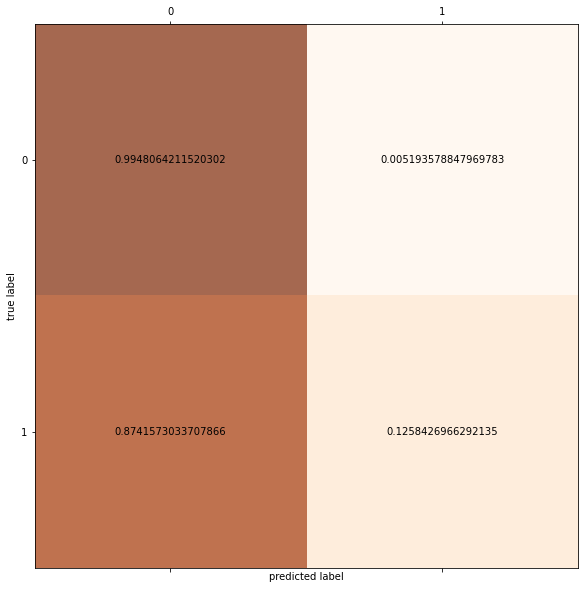

In [166]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

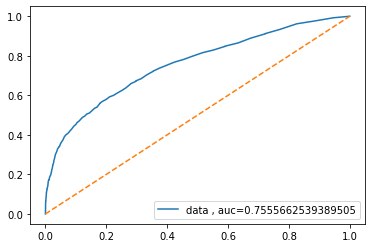

In [167]:
y_pred_proba = clf_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [168]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10590
           1       0.67      0.13      0.21       890

    accuracy                           0.93     11480
   macro avg       0.80      0.56      0.59     11480
weighted avg       0.91      0.93      0.90     11480



## Natural - Lightening only (one-class classification) - cm showed more accurate prediction

In [169]:
# Loading the final dataframe
df_li= pd.read_csv("/Users/gopalika14/Desktop/CA_DATA.csv")
df_li.rename(columns = {'DATE':'YEAR'}, inplace = True)
print(df_li.columns)


Index(['ID', 'LATITUDE', 'LONGITUDE', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'FIPS_CODE',
       'FIPS_NAME', 'County', 'YEAR', 'AWND', 'DX90', 'EMXP', 'EMXT', 'PRCP',
       'TAVG', 'TMAX', 'TMIN', 'NEAR_FID', 'NEAR_DIST'],
      dtype='object')


In [170]:
df_li['DATE'] = pd.to_datetime(df_li['DISCOVERY_DATE'])
df_li['MONTH'] = df_li['DATE'].dt.month
df_li['DAY_OF_WEEK'] = df_li['DATE'].dt.dayofweek
df_li['BURN_TIME'] = (pd.to_datetime(df_li['CONT_DATE']) - df_li['DATE']).astype(int)+1

In [171]:
def set_nat_label(cat):
    cause = 0
    natural = ['Lightning']
    if cat in natural:
        cause = 1   
        
    return cause
     
    
df_li['Lightening'] = df_li['STAT_CAUSE_DESCR'].apply(lambda x: set_nat_label(x)) 
df_li

,ID,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,...,TAVG,TMAX,TMIN,NEAR_FID,NEAR_DIST,DATE,MONTH,DAY_OF_WEEK,BURN_TIME,Lightening
0,128764,38.900278,-120.002500,FED,FS-FIRESTAT,8525,WAGON,2000,2000/07/03 00:00:00+00,185,...,44.0,59.5,28.5,1759,1702.002813,2000-07-03 00:00:00+00:00,7,0,1,0
1,128765,38.893889,-120.032222,FED,FS-FIRESTAT,8527,FALLEN,2000,2000/07/07 00:00:00+00,189,...,44.0,59.5,28.5,1450,844.446657,2000-07-07 00:00:00+00:00,7,4,1,0
2,128766,38.900000,-119.983333,FED,FS-FIRESTAT,8514,HOSPITAL,2000,2000/05/02 00:00:00+00,123,...,44.0,59.5,28.5,99,1141.746990,2000-05-02 00:00:00+00:00,5,1,1,0
3,128767,39.016944,-120.125000,FED,FS-FIRESTAT,8518,SIERRA,2000,2000/06/15 00:00:00+00,167,...,44.0,59.5,28.5,172,2029.504605,2000-06-15 00:00:00+00:00,6,3,1,0
4,128768,38.851389,-119.968333,FED,FS-FIRESTAT,8528,ONEIDAS III,2000,2000/07/03 00:00:00+00,185,...,44.0,59.5,28.5,1868,4435.980601,2000-07-03 00:00:00+00:00,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,1871683,34.111512,-117.234936,NONFED,ST-NASF,NaN,LANKERSHIM AV / MCKINLEY,2015,2015/11/23 00:00:00+00,327,...,76.8,89.0,64.7,1247,493.401885,2015-11-23 00:00:00+00:00,11,0,-1448236799999999999,0
53124,1871684,34.500000,-118.633333,NONFED,ST-NASF,NaN,NaN,2015,2015/11/01 00:00:00+00,305,...,63.7,77.7,49.7,390,798.435161,2015-11-01 00:00:00+00:00,11,6,-1446335999999999999,0
53125,1871685,33.551944,-117.097584,NONFED,ST-NASF,NaN,MURRIETA HOT SPRINGS RD /,2015,2015/11/18 00:00:00+00,322,...,76.6,89.4,63.8,1067,5277.486426,2015-11-18 00:00:00+00:00,11,2,1,0
53126,1871686,37.100631,-121.013584,NONFED,ST-NASF,NaN,HENRY,2015,2015/10/23 00:00:00+00,296,...,63.6,77.4,49.7,1870,3459.238393,2015-10-23 00:00:00+00:00,10,4,1,0


In [172]:
drop_vars = ['ID','EMXP','EMXT','TMAX','TMIN','SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'FIRE_CODE','DISCOVERY_DOY', 'DISCOVERY_DATE',
             'DISCOVERY_TIME','STAT_CAUSE_CODE','OWNER_CODE', 'FIPS_CODE', 'FIPS_NAME',
            'CONT_DATE', 'CONT_DOY', 'CONT_TIME','FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
             'STATE', 'FIPS_CODE','NEAR_FID','FIRE_NAME','County']
df_li= df_li.drop(drop_vars, axis=1)
df_li = df_li.drop('DATE',axis=1)
df_li = df_li.drop('YEAR',axis=1)
df_li = df_li.drop('STAT_CAUSE_DESCR',axis=1)
#df_ca = df_ca.drop('FIRE_SIZE',axis=1)
df_li = df_li.dropna()
df_li.head()


,LATITUDE,LONGITUDE,FIRE_YEAR,FIRE_SIZE,AWND,DX90,PRCP,TAVG,NEAR_DIST,MONTH,DAY_OF_WEEK,BURN_TIME,Lightening
7,39.100833,-120.216667,2000,0.1,4.9,0.0,71.19,50.7,5555.863153,8,0,1,0
10,39.051944,-120.135000,2000,0.3,4.9,0.0,71.19,50.7,1125.279010,10,5,1,0
12,39.185000,-120.034167,2000,0.3,4.9,0.0,71.19,50.7,5949.041640,10,6,259200000000001,0
13,39.185000,-120.102222,2000,0.1,4.9,0.0,71.19,50.7,589.714828,10,2,1,0
17,39.019444,-120.183333,2000,0.5,4.9,0.0,71.19,50.7,5356.143997,6,2,86400000000001,0


In [173]:
X = df_li.drop(['Lightening'], axis=1).values
y = df_li['Lightening'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training
clf_rf = ske.RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.9354529616724738


In [174]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[9716  199]
 [ 528 1037]]


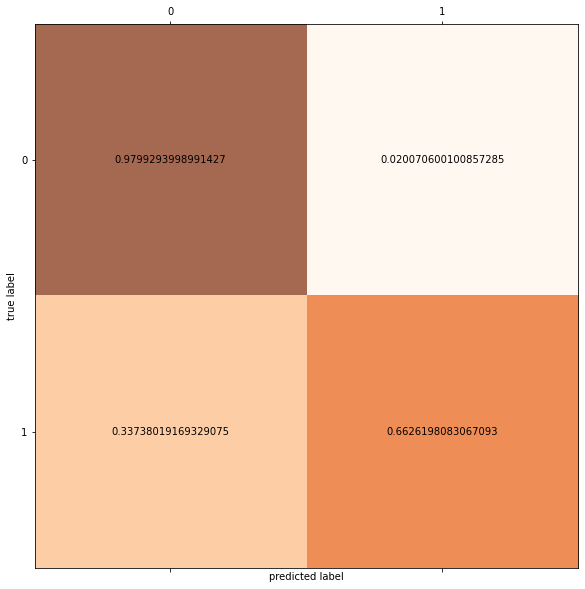

In [175]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

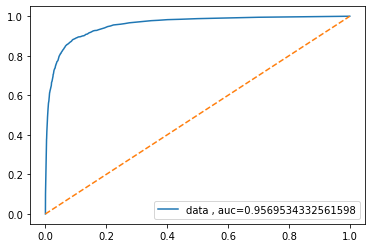

In [176]:
y_pred_proba = clf_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [177]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9915
           1       0.84      0.66      0.74      1565

    accuracy                           0.94     11480
   macro avg       0.89      0.82      0.85     11480
weighted avg       0.93      0.94      0.93     11480



In [ ]:
#Implement Misc or not?